In [2]:
import pandas as pd

# Load the ratings and movies data
ratings_df = pd.read_csv('ml-20m/ratings.csv')
movies_df = pd.read_csv('ml-20m/movies.csv')

print("Ratings sample:")
print(ratings_df.head())
print("\nMovies sample:")
print(movies_df.head())

Ratings sample:
   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

Movies sample:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
print("Ratings DataFrame info:")
print(ratings_df.info())
print("\nMovies DataFrame info:")
print(movies_df.info())

print("\nRatings statistics:")
print(ratings_df.describe())

print("\nNumber of unique users:", ratings_df['userId'].nunique())
print("Number of unique movies:", ratings_df['movieId'].nunique())
print("Number of ratings:", len(ratings_df))


Ratings DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB
None

Movies DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None

Ratings statistics:
             userId       movieId        rating     timestamp
count  2.000026e+07  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00  1.100918e+09
std    4.003863e+04  1.978948e+04  1.051989e+00  1.621694e+08
min    1.000000e+0

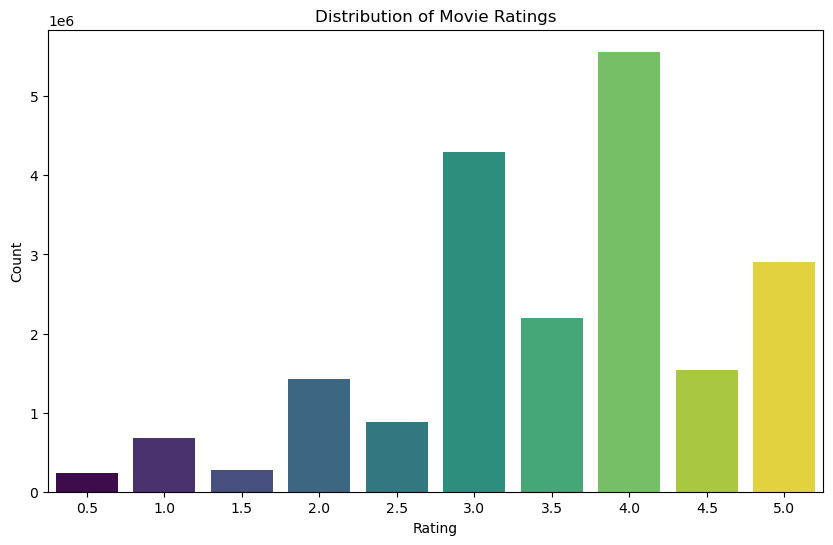

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='rating', hue='rating', data=ratings_df, palette='viridis', legend=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

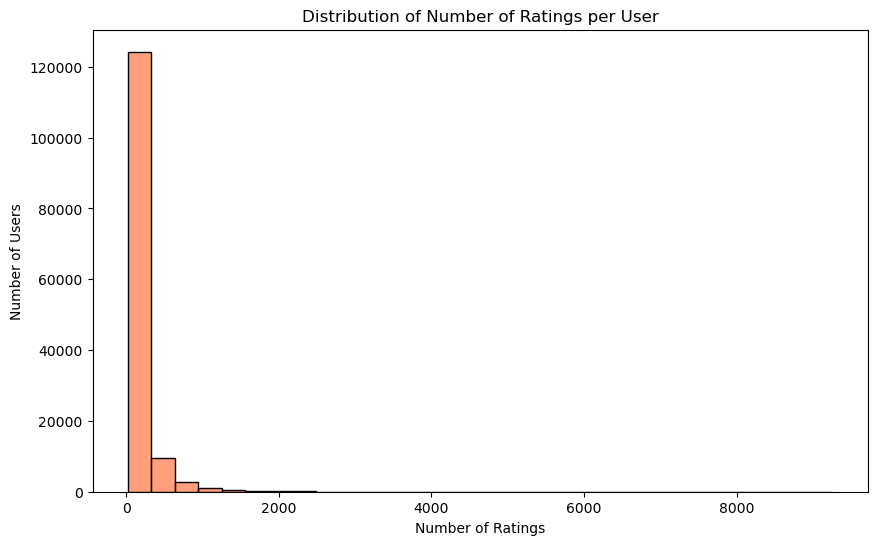

In [6]:
# Count the number of ratings per user
ratings_per_user = ratings_df['userId'].value_counts()

plt.figure(figsize=(10,6))
sns.histplot(ratings_per_user, bins=30, kde=False, color='coral')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

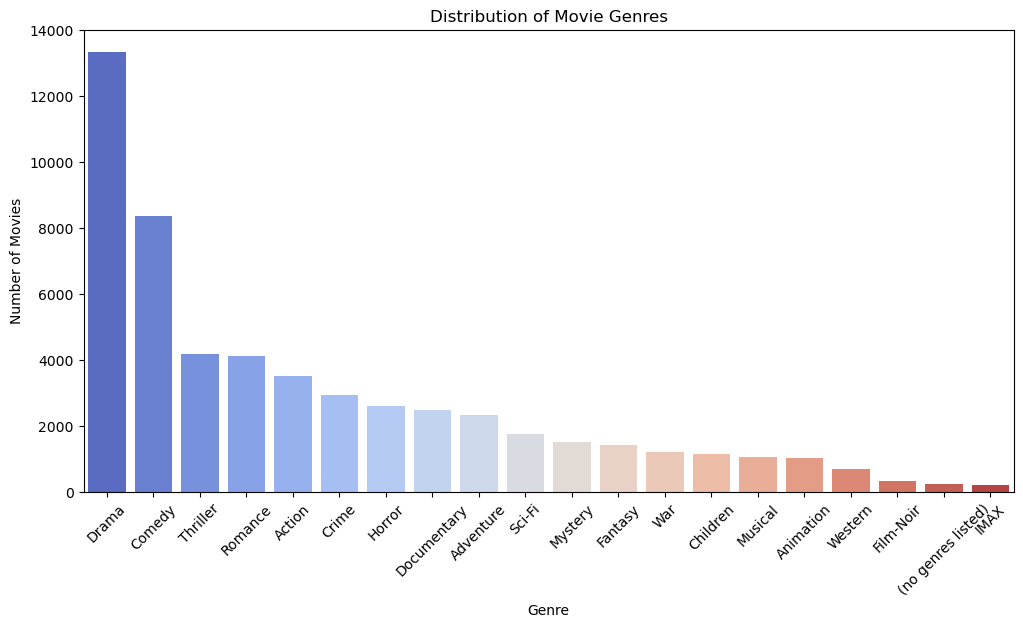

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the genres string into a list for each movie
movies_df['genres_list'] = movies_df['genres'].str.split('|')

# "Explode" the DataFrame so each genre gets its own row
all_genres = movies_df.explode('genres_list')

# Count the number of movies per genre
genre_counts = all_genres['genres_list'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='coolwarm', legend=False)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [9]:
top_movies = ratings_df['movieId'].value_counts().head(10)
top_movies_titles = movies_df[movies_df['movieId'].isin(top_movies.index)][['movieId', 'title']]
top_movies_titles['num_ratings'] = top_movies.values
print(top_movies_titles)

      movieId                                      title  num_ratings
108       110                          Braveheart (1995)        67310
257       260  Star Wars: Episode IV - A New Hope (1977)        66172
293       296                        Pulp Fiction (1994)        63366
315       318           Shawshank Redemption, The (1994)        63299
352       356                        Forrest Gump (1994)        59715
476       480                       Jurassic Park (1993)        54502
523       527                    Schindler's List (1993)        53769
583       589          Terminator 2: Judgment Day (1991)        52244
587       593           Silence of the Lambs, The (1991)        51334
2486     2571                         Matrix, The (1999)        50054


In [10]:
genre_ratings = all_genres.merge(ratings_df, on='movieId')
avg_genre_ratings = genre_ratings.groupby('genres_list')['rating'].mean().sort_values(ascending=False)
print(avg_genre_ratings)

genres_list
Film-Noir             3.965381
War                   3.809531
Documentary           3.739718
Crime                 3.674528
Drama                 3.674296
Mystery               3.663509
IMAX                  3.655946
Animation             3.617494
Western               3.570498
Musical               3.558091
Romance               3.541803
Thriller              3.507111
Fantasy               3.505945
Adventure             3.501893
Action                3.443864
Sci-Fi                3.436773
Comedy                3.426011
Children              3.408114
Horror                3.277224
(no genres listed)    3.006925
Name: rating, dtype: float64


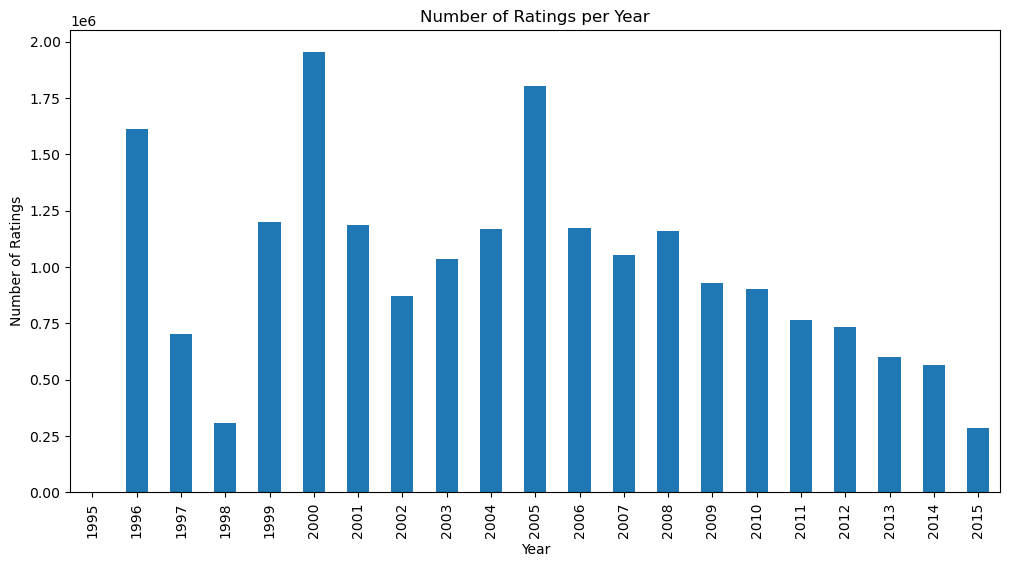

In [11]:
ratings_df['year'] = pd.to_datetime(ratings_df['timestamp'], unit='s').dt.year
ratings_per_year = ratings_df.groupby('year').size()
ratings_per_year.plot(kind='bar', figsize=(12,6), title='Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

In [12]:
from surprise import Dataset, Reader

# Prepare the data for scikit-surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [13]:
from surprise.model_selection import train_test_split

# Split the data into 80% train and 20% test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

print(f"Trainset size: {trainset.n_ratings}")
print(f"Testset size: {len(testset)}")

Trainset size: 16000210
Testset size: 4000053


In [15]:
from surprise import SVD
from surprise import accuracy

# Train SVD (matrix factorization)
svd_model = SVD(n_factors=100, n_epochs=20, random_state=42)
svd_model.fit(trainset)

# Predict on the test set
predictions = svd_model.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f"SVD RMSE: {rmse}")

RMSE: 0.7865
SVD RMSE: 0.7865344870699418


In [16]:
import numpy as np

# Choose a user to recommend for
user_id = 1

# Get all movieIds the user has already rated
user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()

# Get all movieIds in the dataset
all_movie_ids = movies_df['movieId'].unique()

# Find movies the user hasn't rated
unrated_movie_ids = np.setdiff1d(all_movie_ids, user_rated_movies)

# Predict ratings for all unrated movies
predictions = [svd_model.predict(user_id, movie_id) for movie_id in unrated_movie_ids]

# Sort predictions by estimated rating, descending
top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]

# Get movie titles for the top-N recommendations
top_n_movie_ids = [pred.iid for pred in top_n]
top_n_movies = movies_df[movies_df['movieId'].isin(top_n_movie_ids)][['movieId', 'title']]

print("Top 10 movie recommendations for user", user_id)
print(top_n_movies)

Top 10 movie recommendations for user 1
       movieId                                              title
2486      2571                                 Matrix, The (1999)
8975     26674                               Prime Suspect (1991)
9034     26757                            Surviving Desire (1991)
10286    34405                                    Serenity (2005)
10911    44568  Red and the White, The (Csillagosok, katonák) ...
15160    77316  City of Life and Death (Nanjing! Nanjing!) (2009)
16191    81834  Harry Potter and the Deathly Hallows: Part 1 (...
20540   100553                               Frozen Planet (2011)
20994   102445                     Star Trek Into Darkness (2013)
24693   116797                          The Imitation Game (2014)


In [17]:
def recommend_by_genre(genre, n=10):
    # Explode genres
    all_genres = movies_df.explode('genres_list')
    # Filter for the selected genre
    genre_movies = all_genres[all_genres['genres_list'] == genre]
    # Merge with ratings to get average ratings per movie
    genre_ratings = genre_movies.merge(ratings_df, on='movieId')
    avg_ratings = (
        genre_ratings.groupby(['movieId', 'title'])
        .agg({'rating': 'mean', 'userId': 'count'})
        .rename(columns={'rating': 'avg_rating', 'userId': 'num_ratings'})
        .reset_index()
    )
    # Filter for movies with a reasonable number of ratings (e.g., >50)
    avg_ratings = avg_ratings[avg_ratings['num_ratings'] > 50]
    # Sort by average rating
    top_movies = avg_ratings.sort_values('avg_rating', ascending=False).head(n)
    return top_movies[['movieId', 'title', 'avg_rating', 'num_ratings']]

# Example usage:
print(recommend_by_genre('Action'))

      movieId                                              title  avg_rating  \
273      2019        Seven Samurai (Shichinin no samurai) (1954)    4.274180   
982      7502                            Band of Brothers (2001)    4.263182   
802      6016                City of God (Cidade de Deus) (2002)    4.235410   
130       908                          North by Northwest (1959)    4.233538   
401      2959                                  Fight Club (1999)    4.227123   
1715    58559                            Dark Knight, The (2008)    4.220129   
154      1198  Raiders of the Lost Ark (Indiana Jones and the...    4.219009   
412      3030                                     Yojimbo (1961)    4.211717   
39        260          Star Wars: Episode IV - A New Hope (1977)    4.190672   
152      1196  Star Wars: Episode V - The Empire Strikes Back...    4.188202   

      num_ratings  
273         11611  
982          4305  
802         12937  
130         15627  
401         40106  

In [18]:
def hybrid_recommendation(user_id, n=10, min_ratings=10):
    # Get movies rated by the user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    num_user_ratings = len(user_ratings)
    
    if num_user_ratings >= min_ratings:
        # Enough ratings: use collaborative filtering (SVD)
        user_rated_movies = user_ratings['movieId'].tolist()
        unrated_movie_ids = np.setdiff1d(movies_df['movieId'].unique(), user_rated_movies)
        predictions = [svd_model.predict(user_id, movie_id) for movie_id in unrated_movie_ids]
        top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
        top_n_movie_ids = [pred.iid for pred in top_n]
        return movies_df[movies_df['movieId'].isin(top_n_movie_ids)][['movieId', 'title']]
    elif num_user_ratings > 0:
        # Sparse user: recommend top movies from their favorite genres
        # Find genres of movies the user rated highly (e.g., rating >= 4)
        high_rated = user_ratings[user_ratings['rating'] >= 4]
        user_movies = movies_df[movies_df['movieId'].isin(high_rated['movieId'])]
        # Explode genres
        user_genres = user_movies['genres'].str.split('|').explode()
        # Most common genre(s)
        top_genres = user_genres.value_counts().index[:2]  # Top 2 genres
        # Recommend top-rated movies from these genres
        recommendations = pd.DataFrame()
        for genre in top_genres:
            recommendations = pd.concat([recommendations, recommend_by_genre(genre, n=n//len(top_genres))])
        # Remove movies the user has already rated
        recommendations = recommendations[~recommendations['movieId'].isin(user_rated_movies)]
        return recommendations[['movieId', 'title', 'avg_rating', 'num_ratings']].drop_duplicates().head(n)
    else:
        # Cold-start: recommend most popular movies
        most_popular = (
            ratings_df.groupby('movieId')
            .size()
            .sort_values(ascending=False)
            .head(n)
            .index
        )
        return movies_df[movies_df['movieId'].isin(most_popular)][['movieId', 'title']]

# Example usage:
print(hybrid_recommendation(user_id=2))

       movieId                                              title
315        318                   Shawshank Redemption, The (1994)
1173      1198  Raiders of the Lost Ark (Indiana Jones and the...
1222      1250               Bridge on the River Kwai, The (1957)
1263      1291          Indiana Jones and the Last Crusade (1989)
2975      3062                            Longest Day, The (1962)
8144      8827                         Bill Cosby, Himself (1983)
18691    93040                              Civil War, The (1990)
19233    95604                                     The War (2007)
22157   106642                      Day of the Doctor, The (2013)
22679   108583                          Fawlty Towers (1975-1979)


In [19]:
import pickle
from surprise import SVD, Dataset, Reader

# Prepare data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

# Train SVD model (this will take a while)
svd_model = SVD(n_factors=100, n_epochs=20, random_state=42)
svd_model.fit(trainset)

# Save the trained model to a file
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd_model, f)

print("SVD model trained and saved as svd_model.pkl")

SVD model trained and saved as svd_model.pkl
